In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## problem

In [ ]:
to predict health insurance

### data gather

In [7]:
df = pd.read_csv("medical_insurance.csv")
df1 = df.copy()
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA

In [9]:
df1.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## outliers

<Axes: >

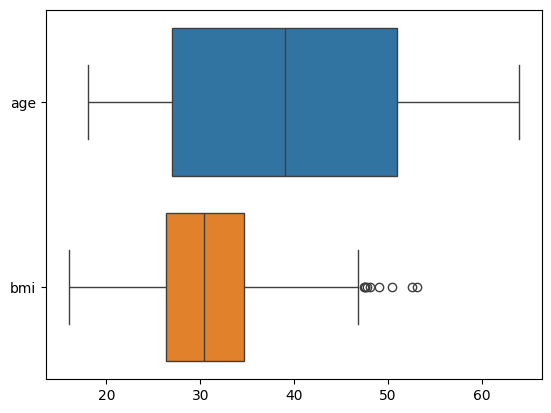

In [19]:
sns.boxplot(df1[["age","bmi"]],orient="h")

{'whiskers': [<matplotlib.lines.Line2D at 0x268c3aad6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x268c3aad950>,
 'boxes': [<matplotlib.lines.Line2D at 0x268c3aad590>],
 'medians': [<matplotlib.lines.Line2D at 0x268c3aadbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x268c3aadd10>],
 'means': []}

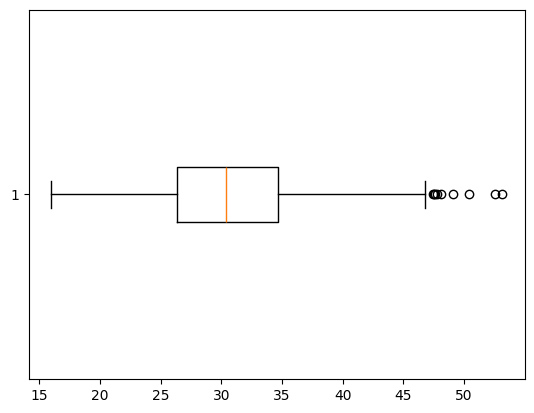

In [23]:
plt.boxplot(df["bmi"],vert=False)

In [26]:
df1["bmi"].max(),df1["bmi"].min()

(np.float64(53.13), np.float64(15.96))

In [28]:
#  To detect outliers
data = df1["bmi"]
zz = zscore(data)
oout = np.where(np.abs(zz)> 3)
data.iloc[oout]

116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64

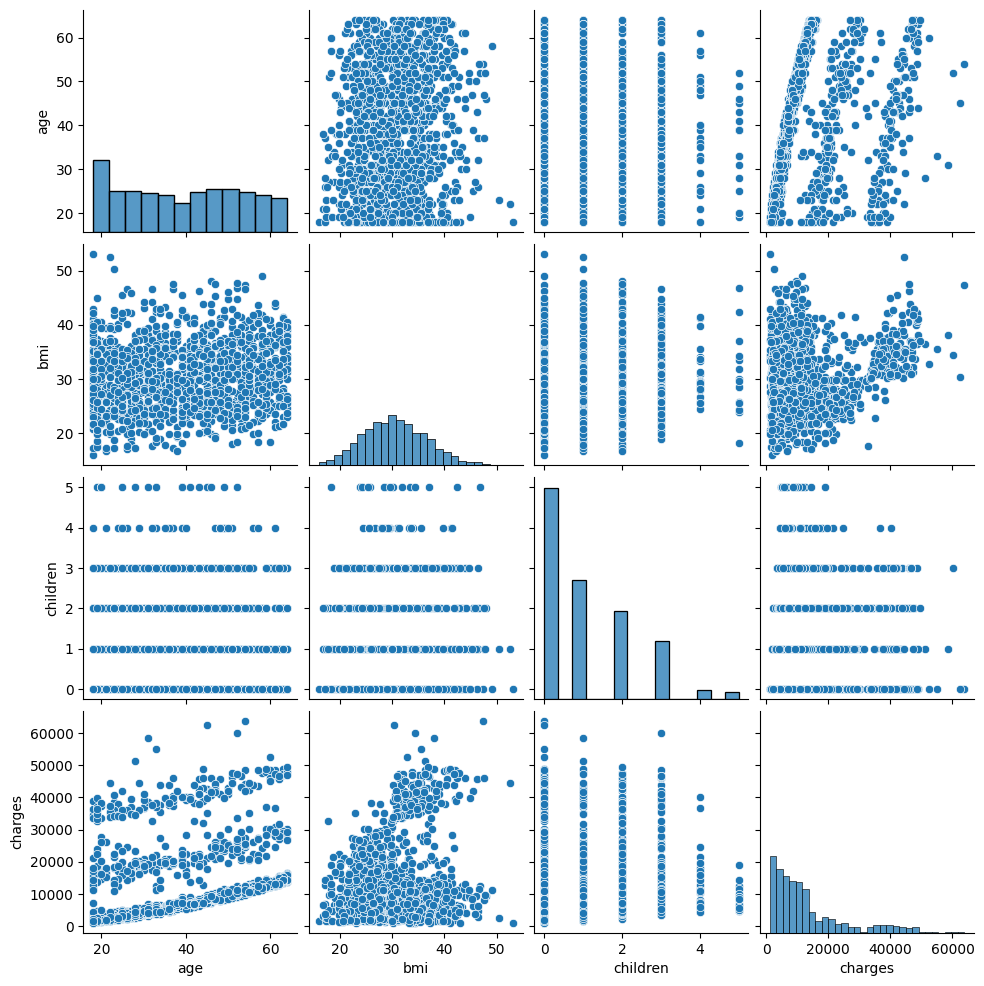

In [30]:
sns.pairplot(df)

### vif

In [ ]:
# only we check vif in numerical independet column 
age	sex	bmi	children	smoker	region	charges

In [32]:
vif_data = df1.drop(["sex","smoker","charges","region"],axis=1)

In [42]:
con = sm.add_constant(vif_data)
dd = [variance_inflation_factor(con.values,i) for i in range(con.shape[1])]

In [49]:
si = pd.Series(dd,index=con.columns)

<Axes: >

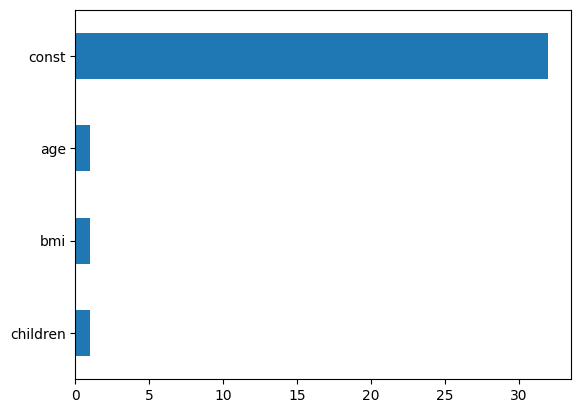

In [52]:
si.sort_values().plot(kind  = "barh")

### feature engineering

In [ ]:
# fill missing value
# habdle outliers

In [65]:
# rename columns name
df1.rename(columns = {"sex": "Gender"},inplace=True)
df1

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
df1["gender"].unique()

array(['female', 'male'], dtype=object)

In [67]:
df1["gender"].replace({'female':0, 'male':1},inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15564\1448813219.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["gender"].replace({'female':0, 'male':1},inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15564\1448813219.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["gender"].r

In [71]:
df1["gender"].value_counts()

gender
1    676
0    662
Name: count, dtype: int64

In [72]:
df1["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [74]:
df1["smoker"].replace({"yes": 0, "no": 1},inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15564\3775464221.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["smoker"].replace({"yes": 0, "no": 1},inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15564\3775464221.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["smoker"].repl

### encodeing

In [76]:
 df1["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [80]:
df1

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,northwest,10600.54830
1334,18,0,31.920,0,1,northeast,2205.98080
1335,18,0,36.850,0,1,southeast,1629.83350
1336,21,0,25.800,0,1,southwest,2007.94500


In [81]:
df0 = pd.get_dummies(df1["region"]).astype(float)

In [85]:
df1 = df1.join(df0)

In [88]:
df1.drop("region",inplace=True,axis=1)

In [89]:
df1

,age,gender,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,0,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,1,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,1,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,1,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,1,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,1,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,1,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,1,2007.94500,0.0,0.0,0.0,1.0


### feature selection

In [91]:
df1.corr()

,age,gender,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
gender,-0.020856,1.000000,0.046371,0.017163,-0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,-0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,-0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,0.025019,-0.076185,-0.003750,-0.007673,1.000000,-0.787251,-0.002811,0.036945,-0.068498,0.036945
charges,0.299008,0.057292,0.198341,0.067998,-0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,-0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,-0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [98]:
# reindex column name
lab = ["age","gender",	"bmi",	"children",	"smoker", "northeast",	"northwest",	"southeast",	"southwest" ,"charges"]

In [103]:
df1 = df1.reindex(columns=lab)
df1

,age,gender,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,0,27.900,0,0,0.0,0.0,0.0,1.0,16884.92400
1,18,1,33.770,1,1,0.0,0.0,1.0,0.0,1725.55230
2,28,1,33.000,3,1,0.0,0.0,1.0,0.0,4449.46200
3,33,1,22.705,0,1,0.0,1.0,0.0,0.0,21984.47061
4,32,1,28.880,0,1,0.0,1.0,0.0,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,0.0,1.0,0.0,0.0,10600.54830
1334,18,0,31.920,0,1,1.0,0.0,0.0,0.0,2205.98080
1335,18,0,36.850,0,1,0.0,0.0,1.0,0.0,1629.83350
1336,21,0,25.800,0,1,0.0,0.0,0.0,1.0,2007.94500


## train test split

In [139]:
x = df1.iloc[:,0:9]
y = df1["charges"]

In [140]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

### model selection

In [141]:
lrr = LinearRegression()
lrr.fit(x_train,y_train)

LinearRegression()

### evaluation on testing

In [148]:
y_pred_test = lrr.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print(mse)
r2 = r2_score(y_test,y_pred_test)
print(r2)
adj2 = 1 - ((1-r2)*((x_test.shape[0]-1)/(x_test.shape[0]- x_test.shape[1]-1)))
# adj_r2 = 1 - ((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print(adj2)


33596915.85136146
0.7835929767120723
0.7760438945043538


### evaluation on training

In [152]:
y_pred_train = lrr.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print(mse)
r2 = r2_score(y_train,y_pred_train)
print(r2)
adj2 = 1 - ((1-r2)*((x_train.shape[0]-1)/(x_train.shape[0]- x_train.shape[1]-1)))
# adj_r2 = 1 - ((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print(adj2)


37277681.70201866
0.7417255854683333
0.7395326894958947


In [ ]:
regularization

### ridge

In [154]:
ridge_model = Ridge()
ridge_model.fit(x_train,y_train)

Ridge()

In [155]:
# testing side using ridge
y_pred_test = ridge_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print(mse)
r2 = r2_score(y_test,y_pred_test)
print(r2)
adj2 = 1 - ((1-r2)*((x_test.shape[0]-1)/(x_test.shape[0]- x_test.shape[1]-1)))
# adj_r2 = 1 - ((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print(adj2)


33642947.83507097
0.7832964719788794
0.7757370465827937


### lasso

In [156]:
lasso_mpdel = Lasso()
lasso_mpdel.fit(x_train,y_train)

Lasso()

In [157]:
# testing side using lasso
y_pred_test = lasso_mpdel.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print(mse)
r2 = r2_score(y_test,y_pred_test)
print(r2)
adj2 = 1 - ((1-r2)*((x_test.shape[0]-1)/(x_test.shape[0]- x_test.shape[1]-1)))
# adj_r2 = 1 - ((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print(adj2)


33605932.26390232
0.7835348995061961
0.7759837913494355


### hyperparameter

## gridsearch cv

In [164]:
esti = Ridge()
para = {"alpha": np.arange(0.01,3,0.03)}

gri = GridSearchCV(estimator=esti,param_grid=para,cv=5)
gri.fit(x_train,y_train)
r_model = gri.best_estimator_
r_model

Ridge(alpha=np.float64(0.97))

In [165]:
# testing side using ridge
y_pred_test = r_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print(mse)
r2 = r2_score(y_test,y_pred_test)
print(r2)
adj2 = 1 - ((1-r2)*((x_test.shape[0]-1)/(x_test.shape[0]- x_test.shape[1]-1)))
# adj_r2 = 1 - ((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print(adj2)


33641489.68928152
0.7833058642990319
0.7757467665420215


In [166]:
y_pred_train = r_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print(mse)
r2 = r2_score(y_train,y_pred_train)
print(r2)
adj2 = 1 - ((1-r2)*((x_train.shape[0]-1)/(x_train.shape[0]- x_train.shape[1]-1)))
# adj_r2 = 1 - ((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print(adj2)


37280498.21738732
0.741706071544059
0.7395130098873576


### random_searchev

In [173]:
esti = Ridge()
para = {"alpha": np.arange(0.01,3,0.03)}

ran = RandomizedSearchCV(estimator=esti,param_distributions=para,cv=5)
ran.fit(x_train,y_train)
ran_mod = ran.best_estimator_
ran_mod

Ridge(alpha=np.float64(1.3))

In [174]:
# testing side using ridge
y_pred_test = ran_mod.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print(mse)
r2 = r2_score(y_test,y_pred_test)
print(r2)
adj2 = 1 - ((1-r2)*((x_test.shape[0]-1)/(x_test.shape[0]- x_test.shape[1]-1)))
# adj_r2 = 1 - ((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print(adj2)


33657787.75776692
0.7832008839341118
0.7756381240713482


### lasso with hyperparameter

In [180]:
est = Lasso()
par = {"alpha":np.arange(0.01,3,0.01)}
las_model = GridSearchCV(estimator=est,param_grid=par,cv=5)
las_model.fit(x_train,y_train)
las_m = las_model.best_estimator_

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+09, tolerance: 1.266e+07
  model = cd_fast.enet_coordinate_descent(


In [181]:
# testing side using lasso
y_pred_test = las_m.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print(mse)
r2 = r2_score(y_test,y_pred_test)
print(r2)
adj2 = 1 - ((1-r2)*((x_test.shape[0]-1)/(x_test.shape[0]- x_test.shape[1]-1)))
# adj_r2 = 1 - ((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print(adj2)


33624091.89154799
0.7834179283240732
0.7758627397772385


Lasso(alpha=np.float64(2.9899999999999998))

#### Final model selected based on MSE and R2 score

In [184]:
import pickle
import json

In [ ]:
# create pickle file of model

In [185]:
with open ("linear_mod.pkl","wb") as file:
    pickle.dump(lrr,file)

In [186]:
pro_data = {"gender": {"male":0,"female":1},
                "smoker" : {"yes":1,"no":0},
                "columns":list(x.columns)}
pro_data

{'gender': {'male': 0, 'female': 1},
 'smoker': {'yes': 1, 'no': 0},
 'columns': ['age',
  'gender',
  'bmi',
  'children',
  'smoker',
  'northeast',
  'northwest',
  'southeast',
  'southwest']}

In [187]:
with open("pro_data.json","w") as file:
    json.dump(pro_data,file)

In [188]:
x.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'northeast', 'northwest',
       'southeast', 'southwest'],
      dtype='object')